## In this presentation, we will

+ Load matplotlib
+ Use `astropy.io.fits` to open a fits file and view essential information
+ Open a FITS image file and display it with matplotlib `imshow`
+ Open a FITS table file
+ Display a 2-D histogram from the FITS table
+ Display a 1-D histogram from the FITS table

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

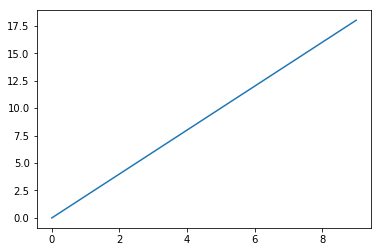

In [2]:
x = np.arange(10)
plt.plot(x, 2*x)

In [3]:
from astropy.io import fits

## How to view an image file

In [4]:
from astropy.utils.data import download_file
image_file = download_file('http://data.astropy.org/tutorials/FITS-images/HorseHead.fits', cache=True)

In [5]:
hdulist = fits.open(image_file)

In [6]:
hdulist.info()

Filename: /Users/juan/.astropy/cache/download/py3/2c9202ae878ecfcb60878ceb63837f5f
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     161   (891, 893)   int16   
  1  er.mask       1 TableHDU        25   1600R x 4C   [F6.2, F6.2, F6.2, F6.2]   


In [7]:
image = hdulist[0].data

In [8]:
type(image)

numpy.ndarray

In [9]:
from matplotlib.colors import LogNorm

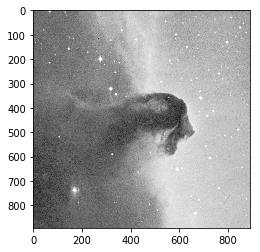

In [10]:
plt.imshow(image, norm=LogNorm(), cmap='Greys_r')

In [11]:
print(image)

[[ 7201  6642  6642 ...  9498  9498 10057]
 [ 6642  6363  6642 ... 10057 10616 10616]
 [ 6922  6642  6922 ... 10337 11175 10616]
 ...
 [ 5412  5132  5412 ... 13000 12580 12021]
 [ 5796  5517  5796 ... 12546 12546 11987]
 [ 5796  5796  6076 ... 11987 12546 12546]]


## How to work with FITS table data

In [12]:
table_filename = download_file( 'http://data.astropy.org/tutorials/FITS-tables/chandra_events.fits', cache=True )
#table_filename = "acisf13177N002_evt2.fits.gz"

In [13]:
hdu_list = fits.open(table_filename)

In [14]:
hdu_list.info()

Filename: /Users/juan/.astropy/cache/download/py3/26e9900d731d08997d99ada3973f4592
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      30   ()      
  1  EVENTS        1 BinTableHDU    890   483964R x 19C   [1D, 1I, 1I, 1J, 1I, 1I, 1I, 1I, 1E, 1E, 1E, 1E, 1J, 1J, 1E, 1J, 1I, 1I, 32X]   
  2  GTI           3 BinTableHDU     28   1R x 2C   [1D, 1D]   
  3  GTI           2 BinTableHDU     28   1R x 2C   [1D, 1D]   
  4  GTI           1 BinTableHDU     28   1R x 2C   [1D, 1D]   
  5  GTI           0 BinTableHDU     28   1R x 2C   [1D, 1D]   
  6  GTI           6 BinTableHDU     28   1R x 2C   [1D, 1D]   


In [15]:
table_data = hdu_list[1].data

In [16]:
table_data.columns

ColDefs(
    name = 'time'; format = '1D'; unit = 's'
    name = 'ccd_id'; format = '1I'
    name = 'node_id'; format = '1I'
    name = 'expno'; format = '1J'
    name = 'chipx'; format = '1I'; unit = 'pixel'; coord_type = 'CPCX'; coord_unit = 'mm'; coord_ref_point = 0.5; coord_ref_value = 0.0; coord_inc = 0.023987
    name = 'chipy'; format = '1I'; unit = 'pixel'; coord_type = 'CPCY'; coord_unit = 'mm'; coord_ref_point = 0.5; coord_ref_value = 0.0; coord_inc = 0.023987
    name = 'tdetx'; format = '1I'; unit = 'pixel'
    name = 'tdety'; format = '1I'; unit = 'pixel'
    name = 'detx'; format = '1E'; unit = 'pixel'; coord_type = 'LONG-TAN'; coord_unit = 'deg'; coord_ref_point = 4096.5; coord_ref_value = 0.0; coord_inc = 0.00013666666666667
    name = 'dety'; format = '1E'; unit = 'pixel'; coord_type = 'NPOL-TAN'; coord_unit = 'deg'; coord_ref_point = 4096.5; coord_ref_value = 0.0; coord_inc = 0.00013666666666667
    name = 'x'; format = '1E'; unit = 'pixel'; coord_type = 'RA---TAN'; c

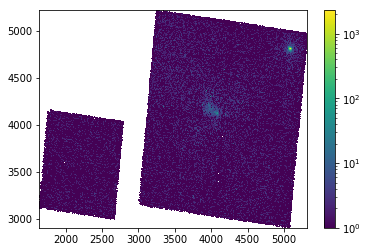

In [17]:
table_image, xedges, yedges, _ = plt.hist2d(table_data['x'], table_data['y'], (1000, 1000), norm=LogNorm())
plt.colorbar()

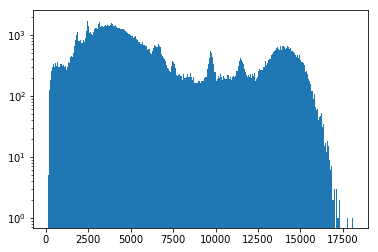

In [18]:
## Make a histogram from a single table column
_ = plt.hist(table_data['energy'], 1000, log=True)

Text(0, 0.5, 'counts per bin')

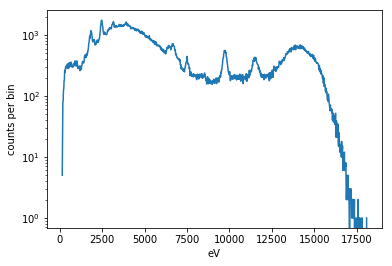

In [19]:
vals, edges = np.histogram(table_data['energy'], 1000)
plt.plot(edges[1:], vals)
plt.semilogy()
plt.xlabel("eV")
plt.ylabel("counts per bin")